# 14.38 PS6
In this problem set, I will be completing problems 2, 4, and 5 from CM-3.

## Problem 2
### Part a
In this problem (as well as throughout the pset) I will use the "dagitty" package in R while explaining the methods by which it generates its solutions. It will be useful to load in Pearl's example as a dagitty graph.

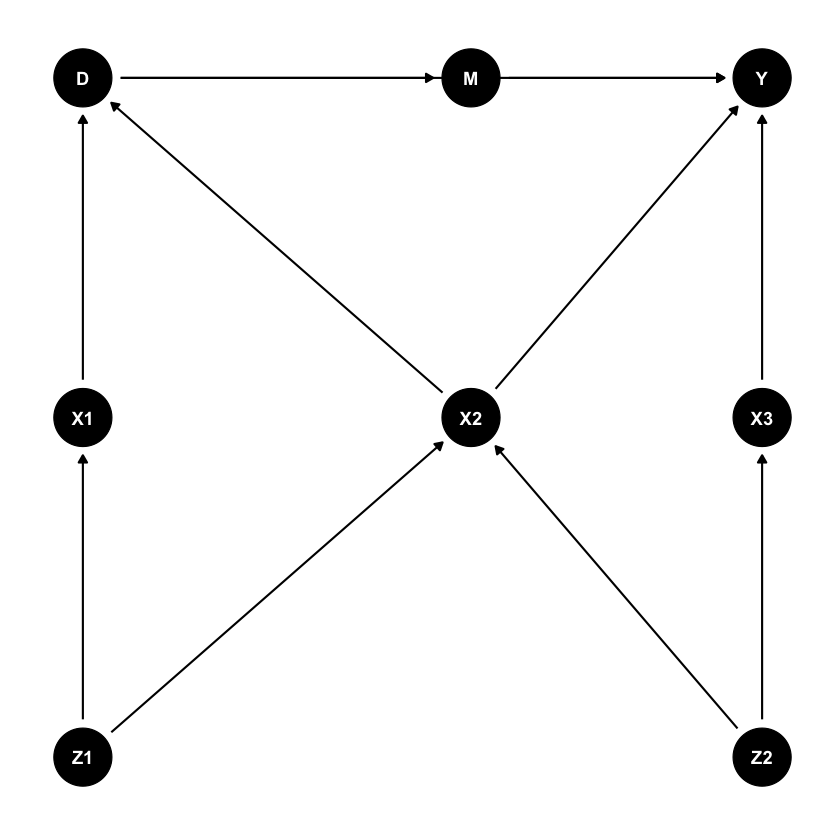

In [25]:

library(dagitty)
library(ggdag)
pearlG <- dagitty('dag{
Z1 [pos="-2,-1.5"]
X1 [pos="-2,0"]
Z2 [pos="1.5,-1.5"]
X3 [pos="1.5, 0"]
Y [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
M [mediator, pos="0,1.5"]
X2 [pos="0,0"]
Z1 -> X1
X1 -> D
Z1 -> X2
Z2 -> X3
X3 -> Y
Z2 -> X2
D -> Y
X2 -> Y
X2 -> D
M->Y
D->M
}')


ggdag(pearlG)+  theme_dag()

Now that we have Pearl's example loaded, we can find the testable implications imposed by the model. These implications all concern conditional independence of two nodes in the graph. Specifically, we can say something like

$$ Y \perp X | Z $$

which is equivalent to $$p(y|x,z) = p(y|z)$$

There can (and generally will be) multiple such implications imposed by a given model. These restrictions are implied by d-separation in the DAG, which we can find by a number methods (backdoor criterion, conditioning on parents, etc.). The dagitty package will do all this work for us.

In [26]:
print( impliedConditionalIndependencies(pearlG) )

D _||_ X3 | Z2
D _||_ X3 | X2, Z1
D _||_ X3 | X1, X2
D _||_ Z1 | X1, X2
D _||_ Z2 | X2, Z1
D _||_ Z2 | X1, X2
M _||_ X1 | D
M _||_ X2 | D
M _||_ X3 | Z2
M _||_ X3 | X2, Z1
M _||_ X3 | X1, X2
M _||_ X3 | D
M _||_ Z1 | X1, X2
M _||_ Z1 | D
M _||_ Z2 | X2, Z1
M _||_ Z2 | X1, X2
M _||_ Z2 | D
X1 _||_ X2 | Z1
X1 _||_ X3
X1 _||_ Y | D, X2, X3
X1 _||_ Y | D, X2, Z2
X1 _||_ Y | D, X2, Z1
X1 _||_ Z2
X2 _||_ X3 | Z2
X3 _||_ Z1
Y _||_ Z1 | X1, X2, Z2
Y _||_ Z1 | D, X2, Z2
Y _||_ Z1 | X1, X2, X3
Y _||_ Z1 | D, X2, X3
Y _||_ Z2 | X2, X3, Z1
Y _||_ Z2 | X1, X2, X3
Y _||_ Z2 | D, X2, X3
Z1 _||_ Z2


### Part b
We can modify the DAG from above to reflect the scenario in which we only measure the specified variables.

D _||_ X3
X2 _||_ X3


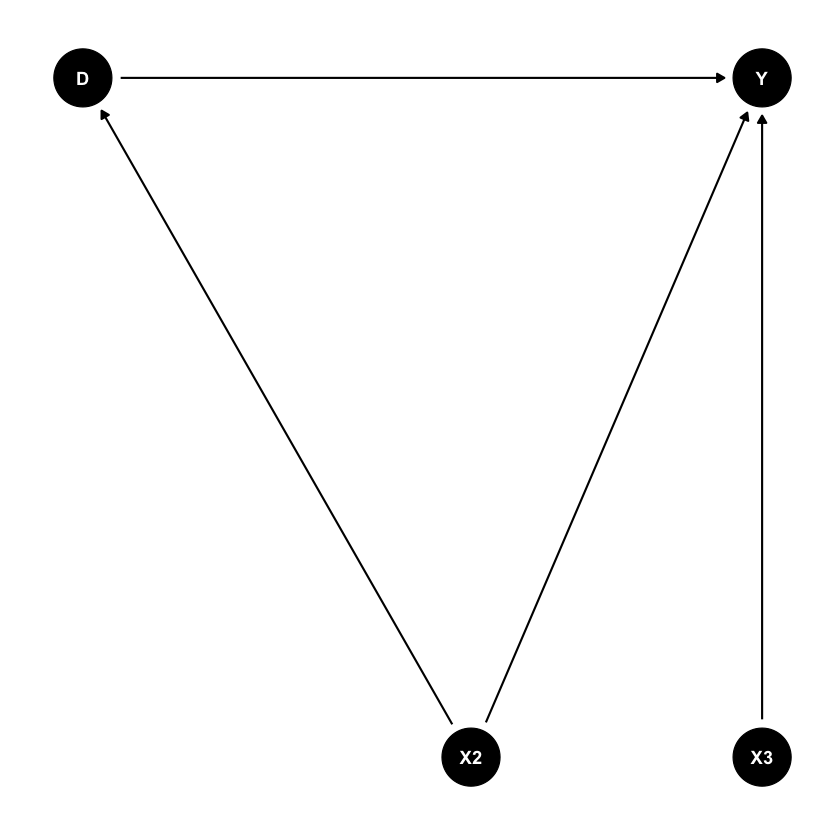

In [6]:
mod1_pearlG <- dagitty('dag{
X3 [pos="1.5, 0"]
Y [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
X2 [pos="0,0"]
X3 -> Y
D -> Y
X2 -> Y
X2 -> D
}')

ggdag(mod1_pearlG)+  theme_dag()

print( impliedConditionalIndependencies(mod1_pearlG) )

From this graph, there are very few testable implications from conditional independence. In fact, the only two are not conditional at all, but merely concern standard independence. $X_2 \perp X_3$ because $X_2$ and $X_3$ are not descendents of one another, and share no common ancestors (same for $D$ and $X_3$).

### Part c
We can again modify the DAG (although the DAG is small enough that we don't really need computational methods here).

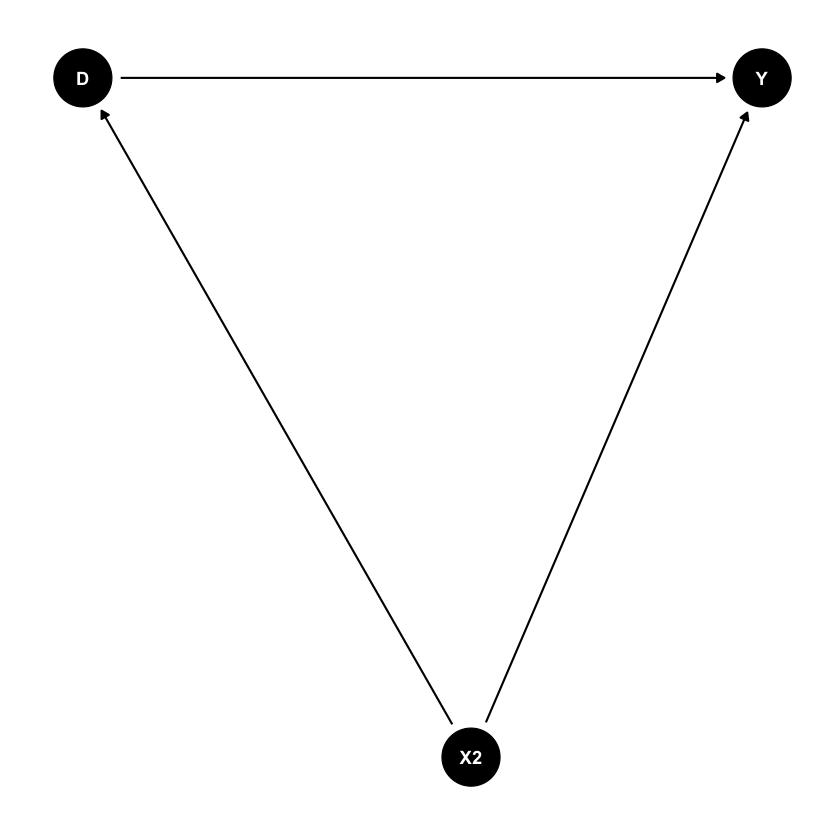

In [10]:
mod2_pearlG <- dagitty('dag{
Y [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
X2 [pos="0,0"]
D -> Y
X2 -> Y
X2 -> D
}')

ggdag(mod2_pearlG)+  theme_dag()

At this point, there are no testable implications implied by the model. The model implies that regardless of conditioning strategies, no two nodes are independent. This is clearly true if we chose not to condition at all, because each node either influences or is influenced directly by another. Furthermore, this influence is pairwise (not mediated or through a backdoor), so even conditioning on the third node does not bring independence.

In [13]:
print( impliedConditionalIndependencies(mod2_pearlG))

This is confirmed by dagitty, as it gives no output to the above function.

### Part d
I take this question to mean that all the nodes in the original graph are measured except $X_3$.

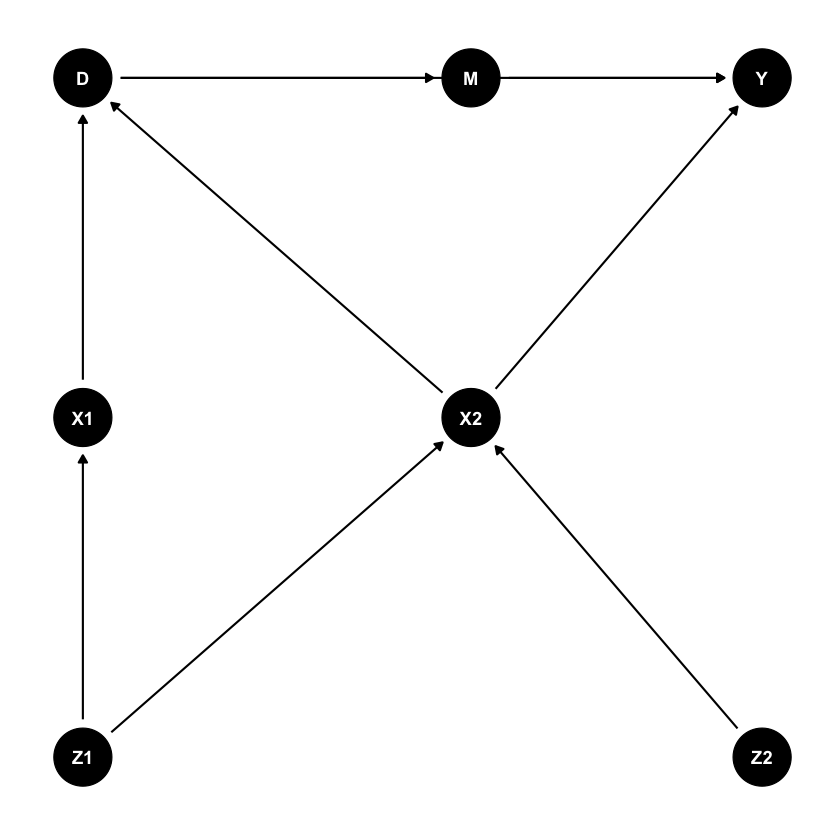

In [15]:
mod3_pearlG <- dagitty('dag{
Z1 [pos="-2,-1.5"]
X1 [pos="-2,0"]
Z2 [pos="1.5,-1.5"]
Y [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
M [mediator, pos="0,1.5"]
X2 [pos="0,0"]
Z1 -> X1
X1 -> D
Z1 -> X2
Z2 -> X2
D -> Y
X2 -> Y
X2 -> D
M->Y
D->M
}')

ggdag(mod3_pearlG)+  theme_dag()

In [16]:
print( impliedConditionalIndependencies(mod3_pearlG))

D _||_ Z1 | X1, X2
D _||_ Z2 | X2, Z1
D _||_ Z2 | X1, X2
M _||_ X1 | D
M _||_ X2 | D
M _||_ Z1 | X1, X2
M _||_ Z1 | D
M _||_ Z2 | X2, Z1
M _||_ Z2 | X1, X2
M _||_ Z2 | D
X1 _||_ X2 | Z1
X1 _||_ Y | D, X2
X1 _||_ Z2
Y _||_ Z1 | X1, X2
Y _||_ Z1 | D, X2
Y _||_ Z2 | X2, Z1
Y _||_ Z2 | X1, X2
Y _||_ Z2 | D, X2
Z1 _||_ Z2


### Part e
This model can be put into a DAG with the following structure.

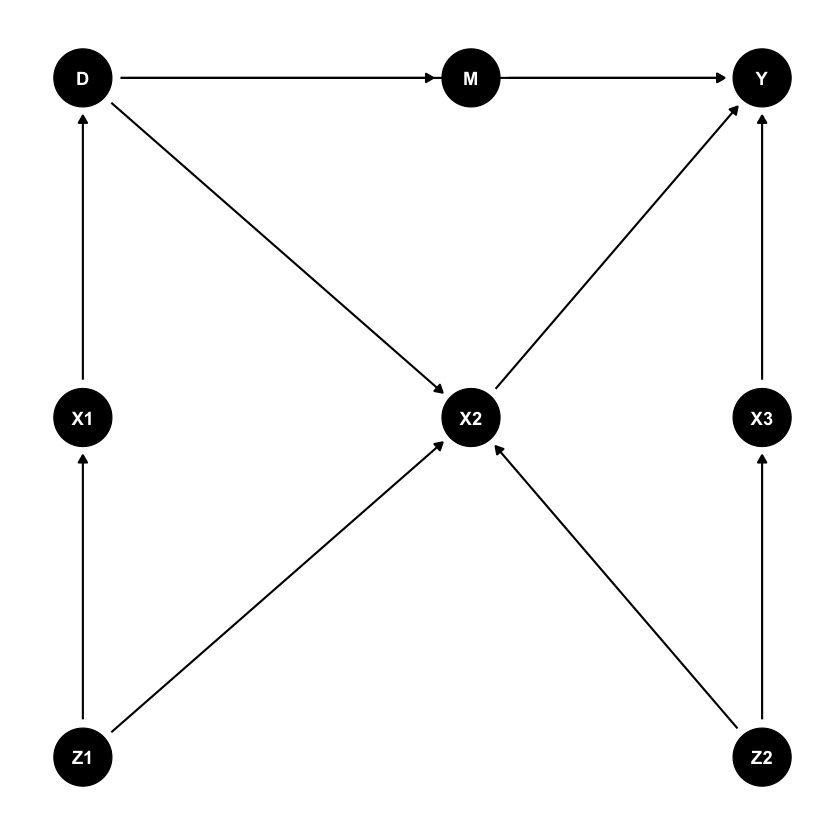

In [28]:
mod4_pearlG <- dagitty('dag{
Z1 [pos="-2,-1.5"]
X1 [pos="-2,0"]
Z2 [pos="1.5,-1.5"]
X3 [pos="1.5, 0"]
Y [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
M [mediator, pos="0,1.5"]
X2 [pos="0,0"]
Z1 -> X1
X1 -> D
Z1 -> X2
Z2 -> X3
X3 -> Y
Z2 -> X2
D -> Y
X2 -> Y
X2 <- D
M->Y
D->M
}')
ggdag(mod4_pearlG) + theme_dag()

Looking at this structure, we see that $X_1$ will not be independent of $X_2$ regardless of conditioning set, because $X_2$ is a descendent of $X_1$. However, in the original DAG, $X_2$ was not a descendent of $X_1$, so we should be able to design a statistical test based on this. In the original DAG, we had that $X_1 \perp X_2 | Z_1$, because $Z_1$ was the common parent of $X_1$ and $X_2$. In this DAG however, we would also have to condition on $D$. Therefore, our statistical test should test if $X_1 \perp X_2 | Z_1$ (we can find one in the statistics literature). 

## Problem 4

First, we load in the proposed DAG.

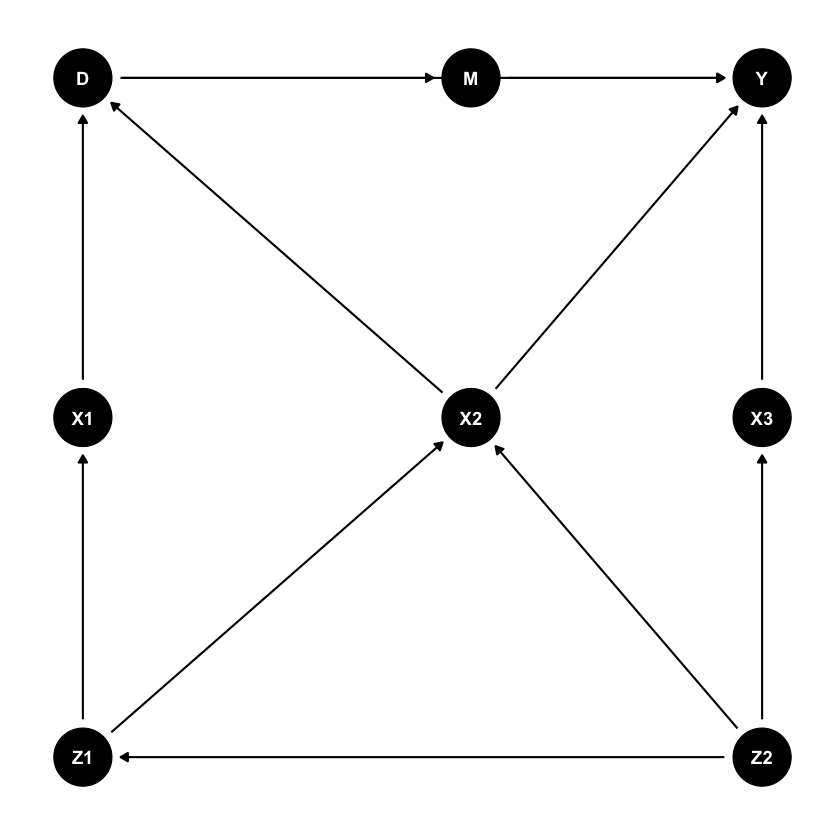

In [46]:
mod5_pearlG <- dagitty('dag{
Z1 [pos="-2,-1.5"]
X1 [pos="-2,0"]
Z2 [pos="1.5,-1.5"]
X3 [pos="1.5, 0"]
Y [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
M [mediator, pos="0,1.5"]
X2 [pos="0,0"]
Z1 -> X1
X1 -> D
Z1 -> X2
Z2 -> X3
X3 -> Y
Z2 -> X2
D -> Y
X2 -> Y
X2 -> D
M->Y
D->M
Z2->Z1
}')

ggdag(mod5_pearlG) + theme_dag()

We can use the "conditioning on parents" criterion, where we condition on the parents of the "causing" node, in addition to a set of nodes $A$ that are not descendents of said node. When we want to find the effect of $D$ on $Y$, we can condition on $\{X_1, X_2\}$.

For the effect of $D$ on $M$, we don't need to condition, because there are no other parents of $M$ and no other children of $D$.

For the effect of $M$ on $Y$, we do need to block the backdoor path that goes through $D$. We can simply close this backdoor path by conditioning on $D$.

By using the parents criterion, we can find an adjustment set for the effect of $X_2$ on $Y$. In this case, we find the set $\{Z_1, Z_2\}$.

We can use dagitty to check our conclusions.

In [59]:
print("Adjustment sets for D on Y:")
print(adjustmentSets(mod5_pearlG, "D", "Y"))
print("Adjustment sets for D on M:")
print(adjustmentSets(mod5_pearlG, "D", "M"))
print("Adjustment sets for M on Y:")
print(adjustmentSets(mod5_pearlG, "M", "Y"))
print("Adjustment sets for X2 on Y:")
print(adjustmentSets(mod5_pearlG, "X2", "Y"))

[1] "Adjustment sets for D on Y:"
{ X2, X3 }
{ X2, Z2 }
{ X2, Z1 }
{ X1, X2 }
[1] "Adjustment sets for D on M:"
 {}
[1] "Adjustment sets for M on Y:"
{ D }
[1] "Adjustment sets for X2 on Y:"
{ X1, X3 }
{ X1, Z2 }
{ X3, Z1 }
{ Z1, Z2 }


In [58]:
print(adjustmentSets(mod5_pearlG, "X2", "Y"))

{ X1, X3 }
{ X1, Z2 }
{ X3, Z1 }
{ Z1, Z2 }


## Problem 5
Let's load in our DAG.

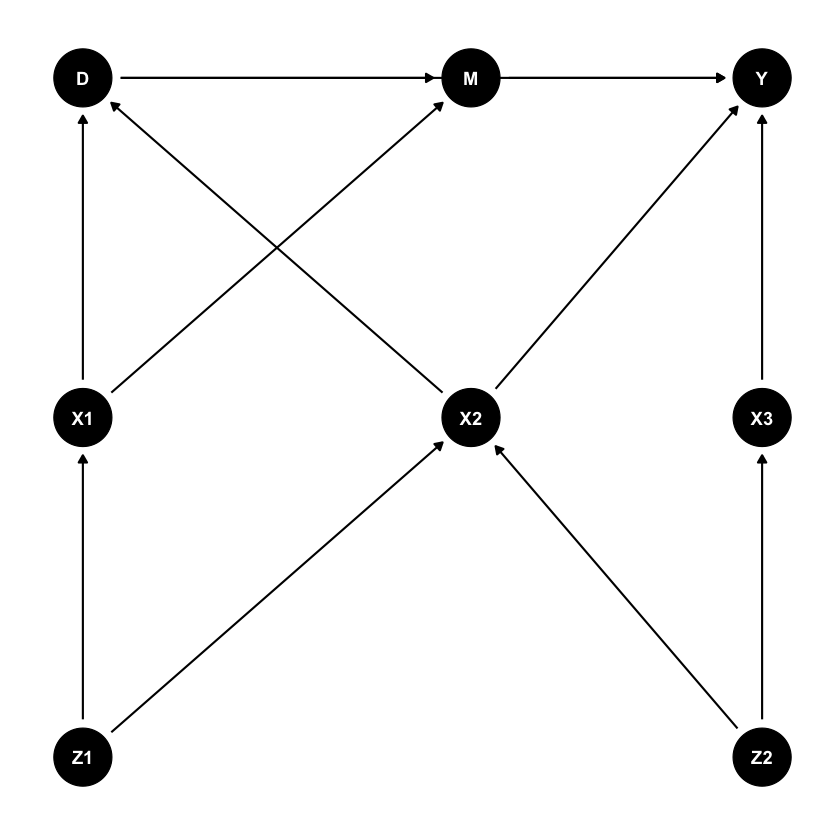

In [62]:
mod6_pearlG <- dagitty('dag{
Z1 [pos="-2,-1.5"]
X1 [pos="-2,0"]
Z2 [pos="1.5,-1.5"]
X3 [pos="1.5, 0"]
Y [outcome,pos="1.5,1.5"]
D [exposure,pos="-2,1.5"]
M [mediator, pos="0,1.5"]
X2 [pos="0,0"]
Z1 -> X1
X1 -> D
Z1 -> X2
Z2 -> X3
X3 -> Y
Z2 -> X2
D -> Y
X2 -> Y
X2 -> D
M->Y
D->M
X1->M
}')

ggdag(mod6_pearlG) + theme_dag()

When we want to find the effect of $D$ on $Y$, we can condition on $\{X_1, X_2\}$ by the parents criterion.

For the effect of $D$ on $M$, we need to condition on $X_1$, because there is a backdoor path from $D$ to $M$ through $X_1$ which we must close (because $X_1$ is a confounder on this path).

For the effect of $M$ on $Y$, we do need to block the backdoor path that goes through $D$, as well as the backdoor path that goes through $X_1$. We can block both of these paths by conditioning on $\{X_1, D\}$.

By using the parents criterion, we can find an adjustment set for the effect of $X_2$ on $Y$. In this case, we find the set $\{Z_1, Z_2\}$.

We can use dagitty to check our conclusions.

In [63]:
print("Adjustment sets for D on Y:")
print(adjustmentSets(mod6_pearlG, "D", "Y"))
print("Adjustment sets for D on M:")
print(adjustmentSets(mod6_pearlG, "D", "M"))
print("Adjustment sets for M on Y:")
print(adjustmentSets(mod6_pearlG, "M", "Y"))
print("Adjustment sets for X2 on Y:")
print(adjustmentSets(mod6_pearlG, "X2", "Y"))

[1] "Adjustment sets for D on Y:"
{ X1, X2 }
[1] "Adjustment sets for D on M:"
{ X1 }
[1] "Adjustment sets for M on Y:"
{ D, X2, X3 }
{ D, X2, Z2 }
{ D, X2, Z1 }
{ D, X1 }
[1] "Adjustment sets for X2 on Y:"
{ X1, X3 }
{ X1, Z2 }
{ X3, Z1 }
{ Z1, Z2 }
